In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("song_data.csv")
dataframe = df.drop(columns="song_name")

In [2]:
# correlation 
dataframe.corr()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.038937,0.099442,0.021479,-0.022672,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,0.016086,0.016469,-0.083447,0.012791,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.082537,-0.557744,-0.093574,-0.136421,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,-0.090694,0.177639,0.213728,-0.121286,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.167143,0.755516,0.062053,0.162448,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.032887,-0.390248,-0.081138,-0.036934,-0.178570
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,1.000000,0.102450,0.090845,0.031876,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.102450,1.000000,0.078164,0.129938,0.199696
speechiness,0.021479,-0.083447,-0.093574,0.213728,0.062053,-0.081138,0.090845,0.078164,1.000000,0.071685,0.011046
tempo,-0.022672,0.012791,-0.136421,-0.121286,0.162448,-0.036934,0.031876,0.129938,0.071685,1.000000,0.037667


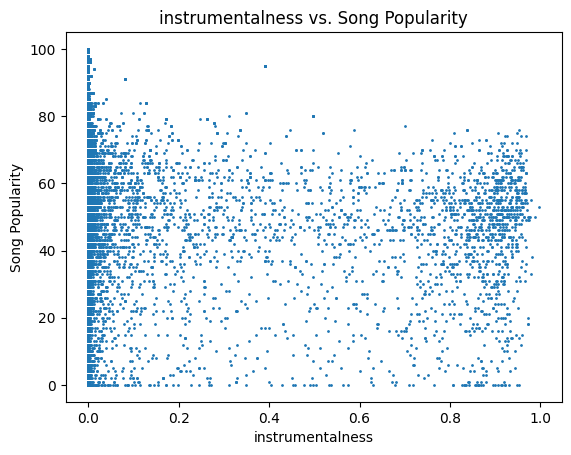

In [3]:
# scatterplot
plt.scatter(dataframe["instrumentalness"],dataframe["song_popularity"], s=1)
plt.title("instrumentalness vs. Song Popularity")
plt.xlabel("instrumentalness")
plt.ylabel("Song Popularity")
plt.show()

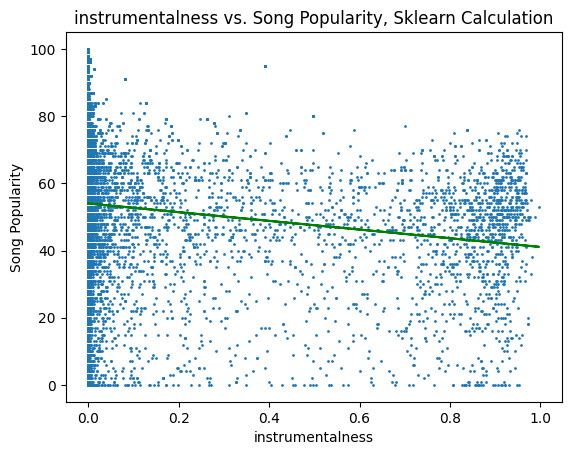

In [4]:
# line of best fit
lr = LinearRegression()
X = dataframe["instrumentalness"].to_numpy().reshape(-1, 1)
y = dataframe["song_popularity"]
lr.fit(X,y)

predicted = lr.predict(X)

plt.scatter(dataframe["instrumentalness"],dataframe["song_popularity"], s=1)
plt.plot(dataframe["instrumentalness"], predicted, color='green')
plt.title("instrumentalness vs. Song Popularity, Sklearn Calculation")
plt.xlabel("instrumentalness")
plt.ylabel("Song Popularity")
plt.show()


In [5]:
# features
intercept = lr.intercept_
print(intercept)
coefficient = lr.coef_
print(lr.coef_)

54.0013800594895
[-12.94101543]


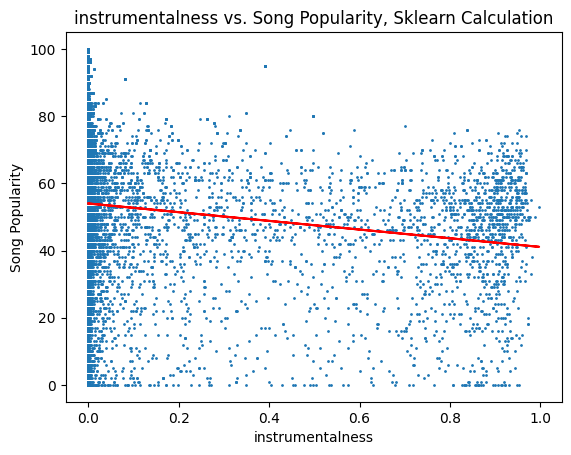

In [6]:
# scatterplot other way
plt.scatter(dataframe["instrumentalness"],dataframe["song_popularity"], s=1)
plt.plot(dataframe["instrumentalness"], coefficient*dataframe["instrumentalness"]+intercept, color="red")
plt.title("instrumentalness vs. Song Popularity, Sklearn Calculation")
plt.xlabel("instrumentalness")
plt.ylabel("Song Popularity")
plt.show()

In [7]:
# Mean Absolute Error
yHat = lr.predict(X)
mae = np.sum(abs((dataframe["song_popularity"]) - yHat)) / len(dataframe["song_popularity"])
print(mae)

17.274180765178848


In [8]:
# multiple linear regressions
X = dataframe.drop(columns=["song_popularity"])
lr.fit(X,y)

intercept = lr.intercept_
print(intercept)
coefficient = lr.coef_
print(lr.coef_)

67.54824698640134
[-5.18537892e-06 -4.24848135e+00  1.29246459e+01 -1.16229634e+01
 -1.03675846e+01 -4.42865139e+00  6.98877994e-01 -2.29379506e+00
 -1.13086156e-02 -8.71822755e+00]


In [9]:
# multiple linear regressions MAE
yHat = lr.predict(X)
mae = np.sum(abs((dataframe["song_popularity"]) - yHat)) / len(dataframe["song_popularity"])
print(mae)

17.047041087889603
